In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# IMPORTANDO DADOS
- ax $\Rightarrow$ aceleração no eixo x (g = 10 m/s^2)
- ay $\Rightarrow$ aceleração no eixo y (g = 10 m/s^2)
- az $\Rightarrow$ aceleração no eixo z (g = 10 m/s^2)
- wx $\Rightarrow$ velocidade angular no eixo x (º/s)
- wy $\Rightarrow$ velocidade angular no eixo y (º/s)
- wz $\Rightarrow$ velocidade angular no eixo z (º/s)

In [2]:
df = pd.read_csv('Aquisition/DataBase.csv')
df

,t,ax,ay,az,wx,wy,wz
0,0.002,-2.191144,-2.517166,5.100793,9548,14884,-5324
1,0.034,-2.278562,-0.597258,5.655839,5132,6476,-13632
2,0.126,-0.731080,-5.636379,1.973197,7400,3380,-9772
3,0.217,2.991978,-5.729187,1.295406,11040,6228,-15132
4,0.309,1.047222,-0.721500,0.287103,10296,8776,-18032
...,...,...,...,...,...,...,...
291,26.748,-0.294288,-0.147892,-0.085023,-3680,9724,-13620
292,26.844,-0.316143,-0.135618,-0.082029,-3676,9716,-13464
293,26.940,-0.309556,-0.139510,-0.091011,-3616,9680,-13508
294,27.033,-0.307760,-0.151485,-0.085921,-3456,9716,-13388


In [3]:
df['dt'] = df.t.diff().fillna(0) 
df.head()

,t,ax,ay,az,wx,wy,wz,dt
0,0.002,-2.191144,-2.517166,5.100793,9548,14884,-5324,0.000
1,0.034,-2.278562,-0.597258,5.655839,5132,6476,-13632,0.032
2,0.126,-0.731080,-5.636379,1.973197,7400,3380,-9772,0.092
3,0.217,2.991978,-5.729187,1.295406,11040,6228,-15132,0.091
4,0.309,1.047222,-0.721500,0.287103,10296,8776,-18032,0.092


# POSIÇÃO LINEAR
$a = \frac{dv}{dt}$

$v = \int_0^t a(t)\, dt$, mas $v = \frac{dx}{dt}$

$\frac{dx}{dt} = \int_0^t a(t)\, dt$

$x = \int_0^t \int_0^t a(t)\, dt\, dt$

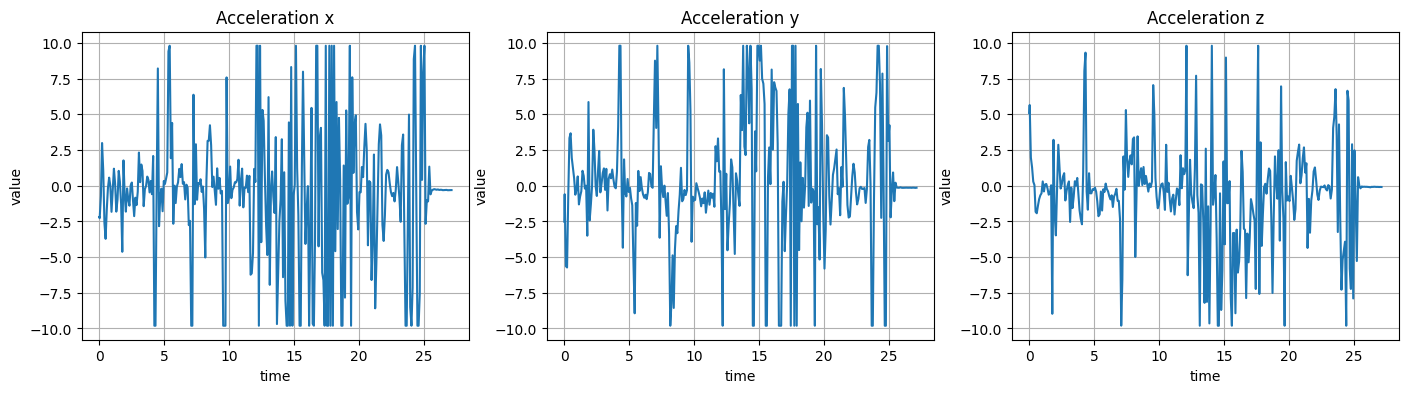

In [4]:
plt.figure(figsize=(17, 4))

plt.subplot(1, 3, 1)
plt.plot(df.t, df.ax)
plt.xlabel('time'), plt.ylabel('value')
plt.title('Acceleration x')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(df.t, df.ay)
plt.xlabel('time'), plt.ylabel('value')
plt.title('Acceleration y')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(df.t, df.az)
plt.xlabel('time'), plt.ylabel('value')
plt.title('Acceleration z')
plt.grid()

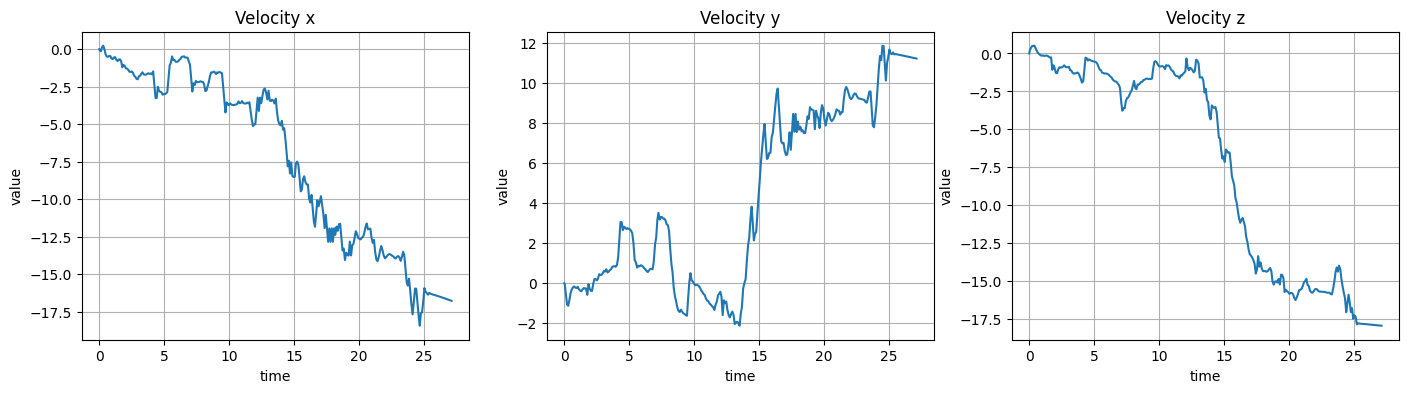

In [5]:
df['vx'] = np.cumsum(df.ax * df.dt)
df['vy'] = np.cumsum(df.ay * df.dt)
df['vz'] = np.cumsum(df.az * df.dt)

plt.figure(figsize=(17, 4))
plt.subplot(1, 3, 1)
plt.plot(df.t, df.vx)
plt.xlabel('time'), plt.ylabel('value')
plt.title('Velocity x')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(df.t, df.vy)
plt.xlabel('time'), plt.ylabel('value')
plt.title('Velocity y')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(df.t, df.vz)
plt.xlabel('time'), plt.ylabel('value')
plt.title('Velocity z')
plt.grid()

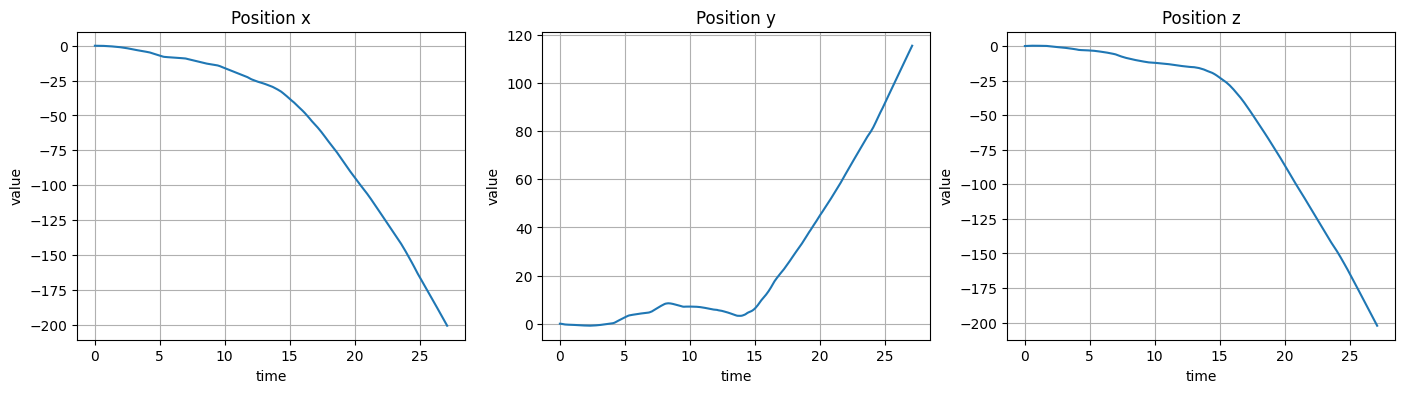

In [6]:
df['x'] = np.cumsum(df.vx * df.dt)
df['y'] = np.cumsum(df.vy * df.dt)
df['z'] = np.cumsum(df.vz * df.dt)

plt.figure(figsize=(17, 4))
plt.subplot(1, 3, 1)
plt.plot(df.t, df.x)
plt.xlabel('time'), plt.ylabel('value')
plt.title('Position x')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(df.t, df.y)
plt.xlabel('time'), plt.ylabel('value')
plt.title('Position y')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(df.t, df.z)
plt.xlabel('time'), plt.ylabel('value')
plt.title('Position z')
plt.grid()

# JOINING

In [7]:
df

,t,ax,ay,az,wx,wy,wz,dt,vx,vy,vz,x,y,z
0,0.002,-2.191144,-2.517166,5.100793,9548,14884,-5324,0.000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000
1,0.034,-2.278562,-0.597258,5.655839,5132,6476,-13632,0.032,-0.072914,-0.019112,0.180987,-0.002333,-0.000612,0.005792
2,0.126,-0.731080,-5.636379,1.973197,7400,3380,-9772,0.092,-0.140173,-0.537659,0.362521,-0.015229,-0.050076,0.039144
3,0.217,2.991978,-5.729187,1.295406,11040,6228,-15132,0.091,0.132097,-1.059015,0.480403,-0.003208,-0.146447,0.082860
4,0.309,1.047222,-0.721500,0.287103,10296,8776,-18032,0.092,0.228441,-1.125393,0.506816,0.017808,-0.249983,0.129487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,26.748,-0.294288,-0.147892,-0.085023,-3680,9724,-13620,0.095,-16.656421,11.289071,-17.914865,-194.394099,111.284942,-195.460501
292,26.844,-0.316143,-0.135618,-0.082029,-3676,9716,-13464,0.096,-16.686771,11.276052,-17.922740,-195.996029,112.367443,-197.181084
293,26.940,-0.309556,-0.139510,-0.091011,-3616,9680,-13508,0.096,-16.716488,11.262659,-17.931477,-197.600812,113.448659,-198.902506
294,27.033,-0.307760,-0.151485,-0.085921,-3456,9716,-13388,0.093,-16.745110,11.248571,-17.939468,-199.158107,114.494776,-200.570876


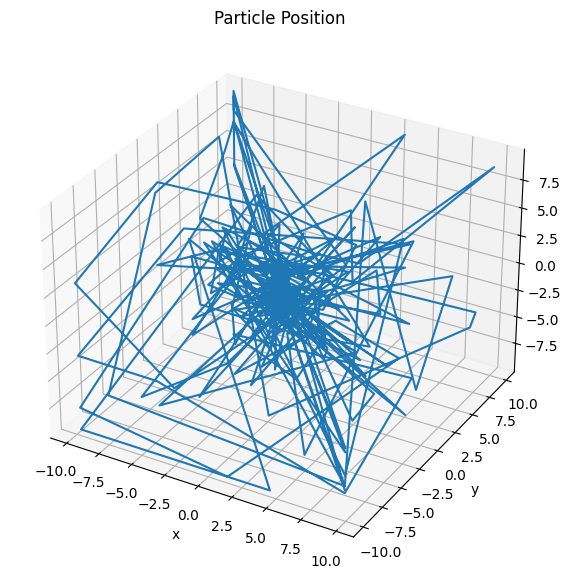

In [8]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
plt.plot(df.ax, df.ay, df.az)
plt.title('Particle Position')
plt.xlabel('x'), plt.ylabel('y')
plt.show()


In [9]:
df.to_csv('DataBase.csv', index=None)